In [19]:
import pandas as pd

In [22]:
# copy your path here
df_ini = pd.read_csv("/Users/marianamatos/ppgti/data-centric-ia/weak-supervised-fraud-detection/data/Fraudulent_E-Commerce_Transaction_Data_2.csv")
df_ini.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [23]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [25]:
def to_snake_case(column_name):
  """
  Convert to lower case and transform to snake_case

  Args:
    column_name (str): Name of the column

  Returns:
    str: snake_case format column name
  """
  return column_name.replace(' ', '_').lower()

df = df_ini.copy()
df.columns = [to_snake_case(col) for col in df.columns]

print(df.columns)

Index(['transaction_id', 'customer_id', 'transaction_amount',
       'transaction_date', 'payment_method', 'product_category', 'quantity',
       'customer_age', 'customer_location', 'device_used', 'ip_address',
       'shipping_address', 'billing_address', 'is_fraudulent',
       'account_age_days', 'transaction_hour'],
      dtype='object')


In [8]:
import pickle

df.to_pickle("/Users/marianamatos/ppgti/data-centric-ia/weak-supervised-fraud-detection/data/df_treated.pkl")

------------------------

## Univariate analysis

**Clients recorency** 

Are all clients new customers?

Yes, there is no evidence that clients purchased more than once, all customers id are unique.

In [26]:
print("Number of unique clients: ",df.customer_id.nunique())
print("Shape od dataset: ", df.shape[0])

Number of unique clients:  23634
Shape od dataset:  23634


**Transaction amount patterns**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_numeric(df:pd.DataFrame, column:str):
    """
    Performs a univariate analysis on the specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be analyzed.
    """
    print(f"---------------------------------------------------------")
    print(f"--- Univariate Analysis of Column: {column} ---")   
    print(f"---------------------------------------------------------")

    # 1. Descriptive Statistics
    print("\n1) Descriptive Statistics:")
    print(df[column].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).apply(lambda x: format(x, 'f')))

    # 2. Frequency Distribution (Top 10 values)
    print("\n2) Top 10 Most Frequent Values:")
    print(df[column].value_counts().head(10))

    # 3. Distribution Visualization
    print("\n3) Distribution Visualization")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()



The mean (226.77) and median (151.76) being different suggests a potential skew distribution in the transaction amounts, with some higher transactions raising the mean. Half of the transactions are below 151.76, while a significant portion reaches higher values, as seen by the 75th percentile (296.05) and the maximum (12701.75), highlighting the range and concentration of spending.

Meanwhile most frequent values appears being below the median, is it possible that **clients are buying the same item?** 75% of the transaction values are below $296.05. Furthemere, 90% of transactions are less than $493.77, 95% below $654.29, and 99% below $1151.19. This details the concentration of most spending in lower values, with a long tail of higher-value transactions.

The distribution of transaction values is skewed, with most transactions concentrated in lower values and a considerable number of outliers representing significantly higher spending. This information can be useful we could categorize transactions based on thresholds defined by percentiles, creating categories such as "low value," "medium value," and "high value" to help identify whether the amount value helps calculating the risk of a transaction.


---------------------------------------------------------
--- Univariate Analysis of Column: transaction_amount ---
---------------------------------------------------------

1) Descriptive Statistics:
count    23634.000000
mean       229.367099
std        282.046669
min         10.000000
25%         69.070000
50%        151.415000
75%        296.127500
90%        498.042000
95%        669.827500
99%       1162.037400
max       9716.500000
Name: transaction_amount, dtype: object

2) Top 10 Most Frequent Values:
transaction_amount
10.42     6
16.20     6
121.71    6
34.85     6
15.26     6
30.58     5
49.68     5
60.63     5
28.72     5
21.37     5
Name: count, dtype: int64

3) Distribution Visualization


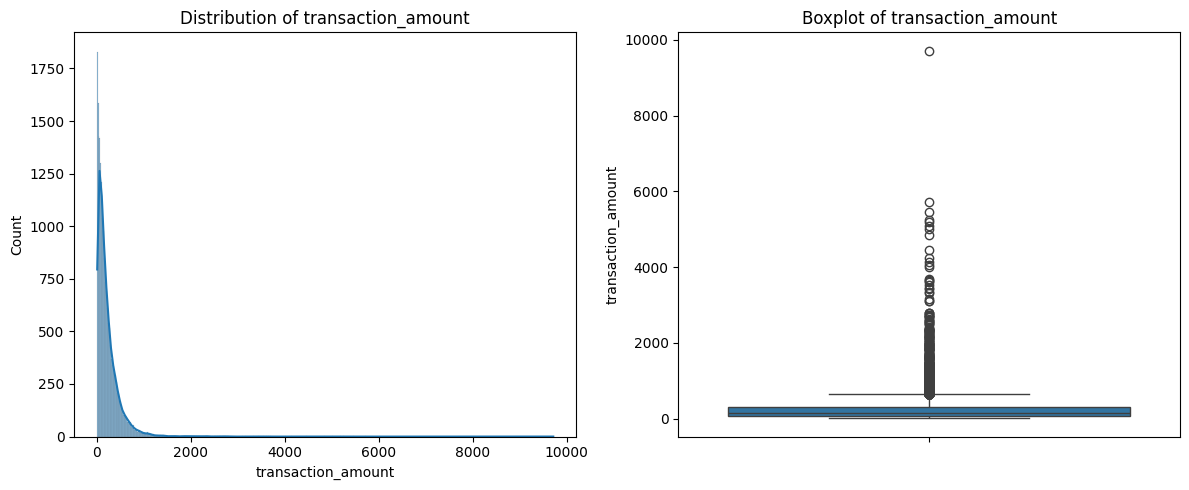

In [28]:
analyze_numeric(df, "transaction_amount")

**Product category**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_categorical(df:pd.DataFrame, column:str, high_demension=False):
    """
    Performs a univariate analysis on column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column.
        high_dimension (bool, Default: False): Indicates which graph to visualize
    """
    print(f"---------------------------------------------------------")
    print(f"--- Univariate Analysis of Column: {column} ---")   
    print(f"---------------------------------------------------------")

    # 1. Frequency Count
    print("\n1) Frequency Count:")
    print(df[column].value_counts(normalize=True)*100)

    # 2. Number of Unique Categories
    unique_categories = df[column].nunique()
    print(f"\n2) Unique Categories: {unique_categories}")

    # 3. Visualization
    print("\n3) Distribution Visualization")
    if high_demension == False:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y=column, order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel('Product Category')
        plt.tight_layout()
        plt.show()

    else:
        unique_count = df[column].nunique()
        print(f"Number of unique values in '{column}': {unique_count}")

        # 1. Top 20 Categories Bar Chart
        top_20_counts = df[column].value_counts().nlargest(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_20_counts.index, y=top_20_counts.values)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Top {20} Categories in {column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # 2. "Other" Category Aggregation (visualized as a bar chart with "Other")
        value_counts = df[column].value_counts()
        n_largest = value_counts.nlargest(20)
        threshold = n_largest.min()
        others_sum = value_counts[value_counts < threshold].sum()
        others_series = pd.Series({'Other': others_sum})

        # Identify values below the threshold
        others = value_counts[value_counts < threshold].sum()
        top_20_plus_other = pd.concat([n_largest, others_series]).sort_values(ascending=False)

        # top_20_plus_other = value_counts.nlargest(20).append(pd.Series({'Other': others}))
        top_20_plus_other = top_20_plus_other.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_20_plus_other.index, y=top_20_plus_other.values)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Top {20} Categories and "Other" in {column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()



The relatively even distribution across the five product categories as indicated by the similar frequency counts (around 20% each) and the small number of unique categories, 

With only five product categories exhibiting similar frequency counts. Can suggest that fraudulent activities, might not be heavily skewed towards a single product type based solely on the overall purchase volume. **Product category alone might not be a strong predictor of fraud** without considering other features, prompting the exploration of combinations with other variables such as:

product_category X quantity  
product_category X customer_age  
product_category X customer_location  
product_category X device_used  
product_category X transaction_hour  
product_category X account_age_days  
product_category X quantity  X transaction_amount
product_category X is_fraudulent (worth analyze bivariate?)  

To identify potentially suspicious patterns within each category.




---------------------------------------------------------
--- Univariate Analysis of Column: product_category ---
---------------------------------------------------------

1) Frequency Count:
product_category
home & garden      20.250487
electronics        20.089701
toys & games       20.013540
clothing           19.882373
health & beauty    19.763899
Name: proportion, dtype: float64

2) Unique Categories: 5

3) Distribution Visualization


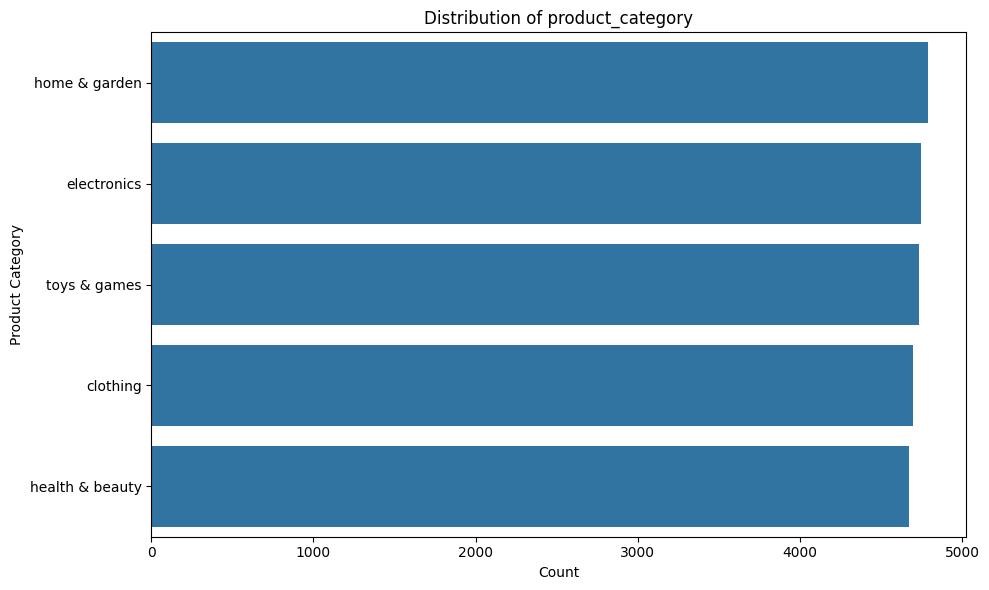

In [30]:
analyze_categorical(df, "product_category", high_demension=False)

**payment_method**

We can observe a similar behavior to the previously analyzed variable (product_category), containing only four categories with similar frequencies. This might indicate that this variable alone may not strongly predict fraud. Subsequently, we will perform a bivariate analysis of the 'payment_method' and 'is_fraudulent' variable. Additionally, similar to the 'product_category' variable, we can conduct bivariate analyses of 'payment_method' with other variables to generate insights that might reveal information about fraud.

payment_method X customer_age    
payment_method X device_used  
payment_method X account_age_days  
payment_method X customer_location  
payment_method X ip_address  
payment_method X transaction_amount (after re-categorize)  
payment_method X is_fraudulent  

---------------------------------------------------------
--- Univariate Analysis of Column: payment_method ---
---------------------------------------------------------

1) Frequency Count:
payment_method
debit card       25.184057
credit card      25.061352
PayPal           24.959804
bank transfer    24.794787
Name: proportion, dtype: float64

2) Unique Categories: 4

3) Distribution Visualization


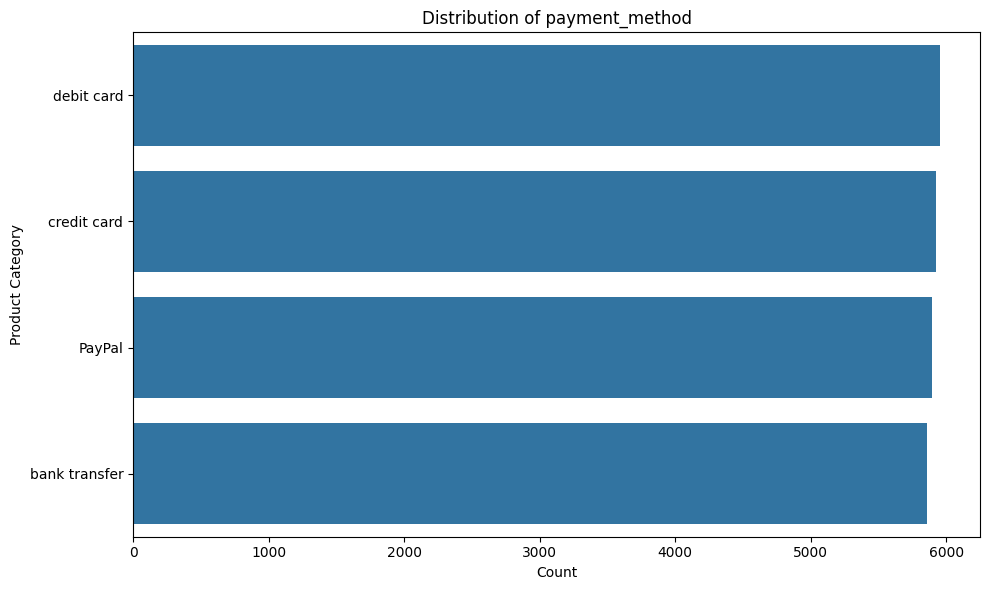

In [31]:
analyze_categorical(df, "payment_method")

**Quantity**

In the dataset quantity is set as int64 dtype. This variable tells abouts the numbers of itens a client have brought, so is better that we analyse it as a objet/category dtype.

Given that the "quantity" of product purchases has only 5 distinct values with a relatively even distribution (20%), it suggests that the number of times a customer bought a product, in isolation, might not be a strong indicator of fraudulent activity, it is necessary combine this information with other features to identify potentially suspicious patterns.

---------------------------------------------------------
--- Univariate Analysis of Column: quantity ---
---------------------------------------------------------

1) Frequency Count:
quantity
5    20.377422
2    20.157400
1    20.068545
3    19.801980
4    19.594652
Name: proportion, dtype: float64

2) Unique Categories: 5

3) Distribution Visualization


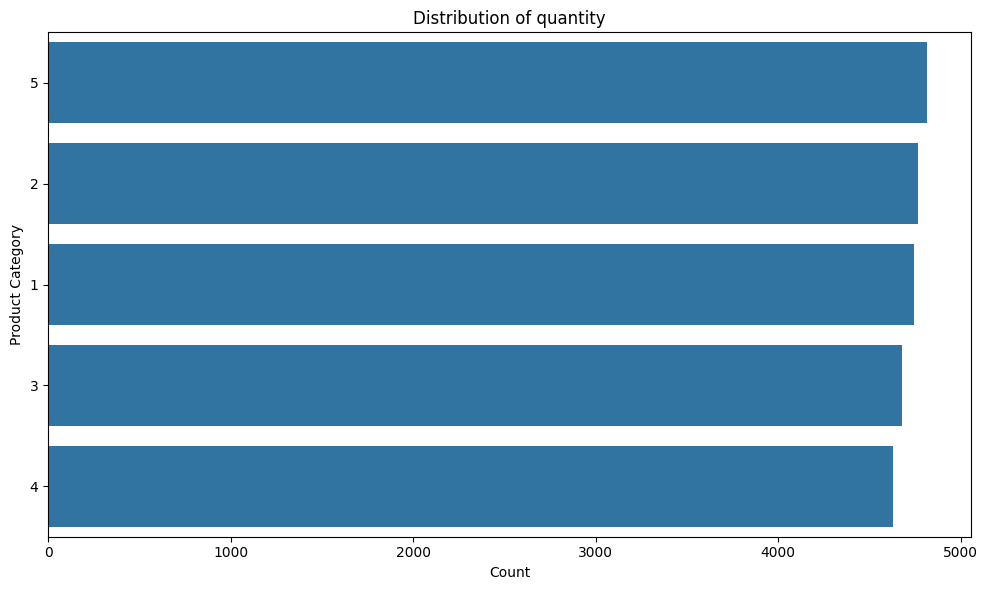

In [32]:
df["quantity"] = df["quantity"].astype(object)
analyze_categorical(df, "quantity")

**Client age**

The "customer_age" column reveals a client base with an average age around 34-35 years old, with a concentration of customers in their late 20s to early 40s, and the presence of an illogical minimum age of -16, which requires droping lines that has those values before using this feature to inform a fraud label.

This variable can be used to create a new feature that categorizes ages by range, we can see there is a small tail after the age 60. And by commom knowledge, is very attipical to see infants (less than 9 years old buying online), so we can create feature functions to describe this behaviour and combine with another features to us help better understand the target.

---------------------------------------------------------
--- Univariate Analysis of Column: customer_age ---
---------------------------------------------------------

1) Descriptive Statistics:
count    23634.000000
mean        34.560210
std         10.009471
min         -2.000000
25%         28.000000
50%         35.000000
75%         41.000000
90%         47.000000
95%         51.000000
99%         58.000000
max         73.000000
Name: customer_age, dtype: object

2) Top 10 Most Frequent Values:
customer_age
33    954
32    936
37    924
36    916
39    913
30    889
35    888
34    878
38    874
29    861
Name: count, dtype: int64

3) Distribution Visualization


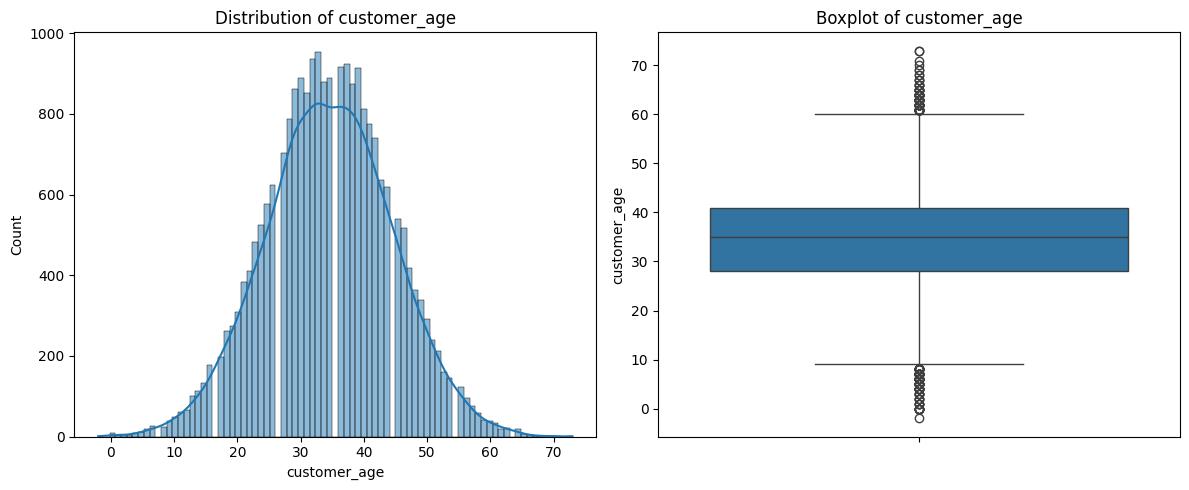

In [33]:
analyze_numeric(df, "customer_age")

**Customer location**

Customer location has 99,135 categories with small proportion for even the most frequent locations (around 8.5%), some names appear more frequently than others. we can ask if this could indicate that **less common neighborhoods might pose a potential risk?** Or the fraudster's profile blends with that of a legitimate purchase. For a better understanding, we should analyze the 'customer_location' data in with other variables

---------------------------------------------------------
--- Univariate Analysis of Column: customer_location ---
---------------------------------------------------------

1) Frequency Count:
customer_location
North Michael       0.126936
East Michael        0.101549
West Christopher    0.088855
East David          0.084624
Lake Michael        0.084624
                      ...   
Turnershire         0.004231
North Robertberg    0.004231
West Jacobhaven     0.004231
New Stephenshire    0.004231
Holtport            0.004231
Name: proportion, Length: 14868, dtype: float64

2) Unique Categories: 14868

3) Distribution Visualization
Number of unique values in 'customer_location': 14868


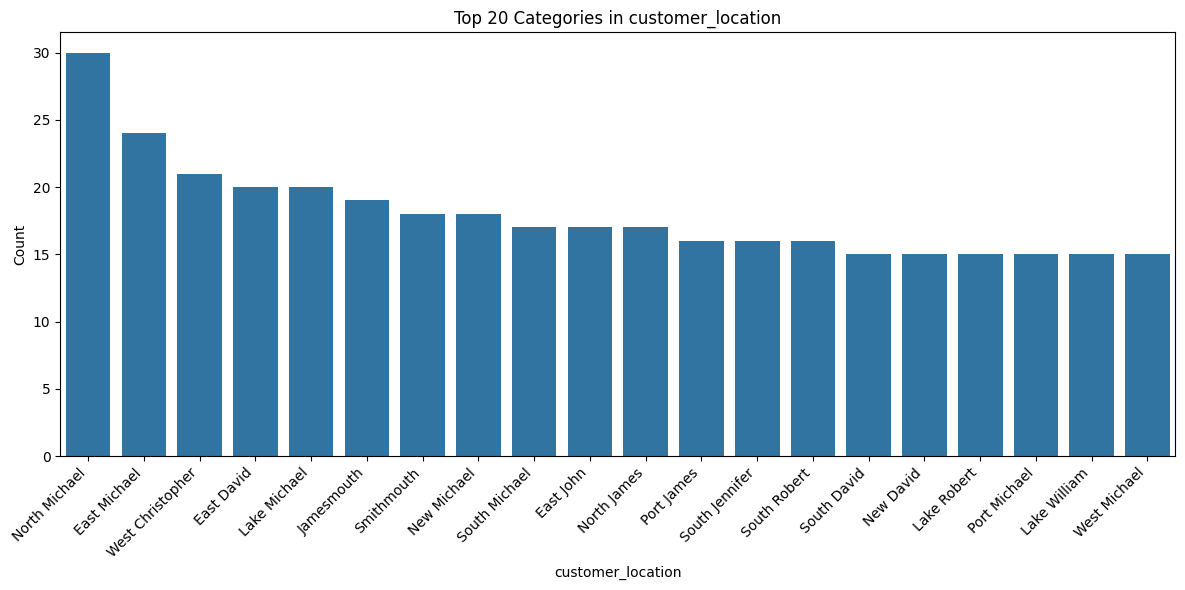

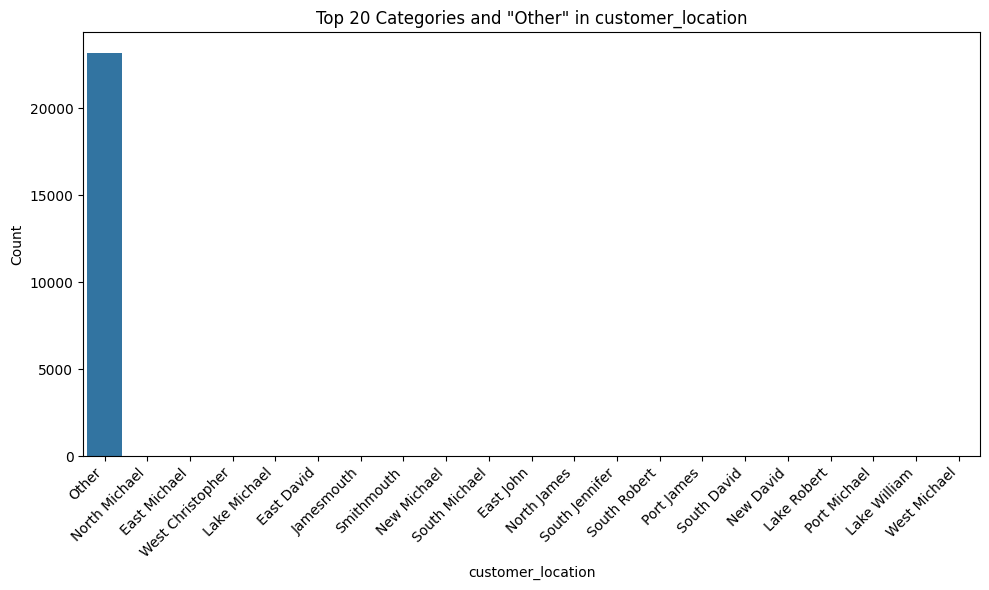

In [34]:
analyze_categorical(df, "customer_location", high_demension=True)

**Device used**

Like most of categorical data we've analysed, this one is not that different. As we know, by now,  such behaviour often suggests that this variable, in isolation, may not be a strong predictor of fraud. Therefore, to gain more insightful understanding, we should proceed with multivariate analysis to explore its potential relationships with other features.

---------------------------------------------------------
--- Univariate Analysis of Column: device_used ---
---------------------------------------------------------

1) Frequency Count:
device_used
desktop    33.523737
mobile     33.346027
tablet     33.130236
Name: proportion, dtype: float64

2) Unique Categories: 3

3) Distribution Visualization


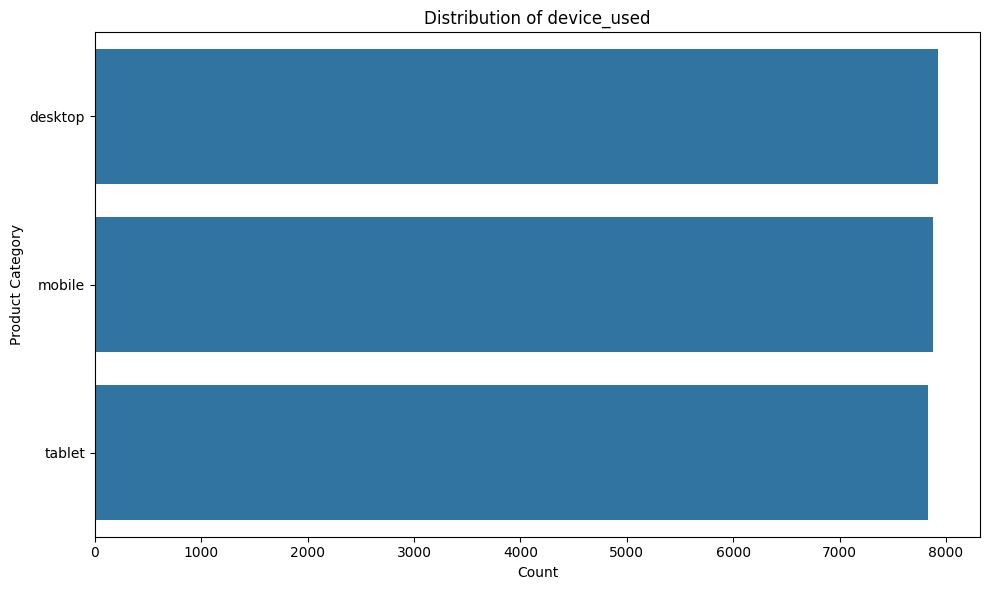

In [35]:
analyze_categorical(df,"device_used")

**Ip address**

The results we're seeing are very interesting and raise some important questions about our data. We know that each client has a unique ID, and that each client made a distinct purchase. Yet, we observe that only a small number of IP addresses appear more than once. Could this be indicative of fraudulent activity?

In [36]:
df["ip_address"] = df["ip_address"].astype(object)
df.ip_address.value_counts()

ip_address
110.87.246.85      1
61.162.241.90      1
153.166.182.76     1
143.190.142.67     1
126.102.30.169     1
                  ..
204.160.53.161     1
18.229.233.80      1
147.170.215.253    1
46.30.93.4         1
116.188.254.162    1
Name: count, Length: 23634, dtype: int64

In [37]:
def analyze_ip_address_frequency_comparison(df: pd.DataFrame,
                                            ip_address_column: str) -> None:
    """
    Analyzes IP and address frequency in a DataFrame, categorizes them as 'seen more than once'
    or 'seen once', and compares their distributions.

    Args:
        df: The Pandas DataFrame containing transaction data.
        ip_address_column: The name of the column containing IP or addresses.
    """
    # 1. Calculate IP Address Frequencies
    df_aux = df.copy()

    ip_address_counts = df_aux[ip_address_column].value_counts()

    # 2. Create a new column 'ip_addrss_frequency_category'
    df_aux['ip_addrss_frequency_category'] = df_aux[ip_address_column].map(
        lambda x: 'More than once' if ip_address_counts[x] > 1 else 'Once'
    )

    # 3. Print the count of IPs in each category
    print("\nIP Address Frequency Categories:")
    print(df_aux['ip_addrss_frequency_category'].value_counts(normalize=True))

    print("\nHow many appear more than once: ",df_aux['ip_addrss_frequency_category'].value_counts()[1])

    # 5. Visualize the distribution of 'ip_addrss_frequency_category'
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_aux, x='ip_addrss_frequency_category')
    plt.title('Distribution of IP Address Frequency Categories')
    plt.xlabel('IP Address Frequency Category')
    plt.ylabel('Count')
    plt.show()



IP Address Frequency Categories:
ip_addrss_frequency_category
Once              0.999591
More than once    0.000409
Name: proportion, dtype: float64

How many IP's appear more than once:  602


/var/folders/lf/kdk85w7d6r1_7wly2dv5687m0000gn/T/ipykernel_41890/1693280401.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nHow many IP's appear more than once: ",df_aux['ip_addrss_frequency_category'].value_counts()[1])


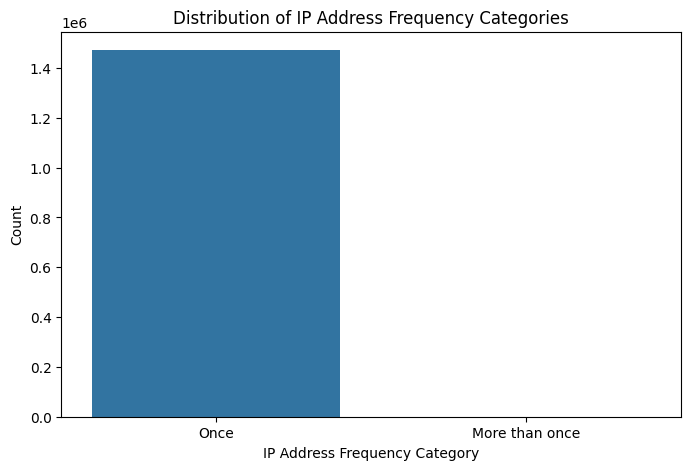

In [57]:
analyze_ip_address_frequency_comparison(df, "ip_address")

**Shipping address**

Like the IP address variable, this analysis brings up similar questions regarding the data. With only 8 frequently repeated records, we can analyze the IP and address data for further insights


IP Address Frequency Categories:
ip_addrss_frequency_category
Once              0.999995
More than once    0.000005
Name: proportion, dtype: float64

How many IP's appear more than once:  8


/var/folders/lf/kdk85w7d6r1_7wly2dv5687m0000gn/T/ipykernel_41890/1693280401.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nHow many IP's appear more than once: ",df_aux['ip_addrss_frequency_category'].value_counts()[1])


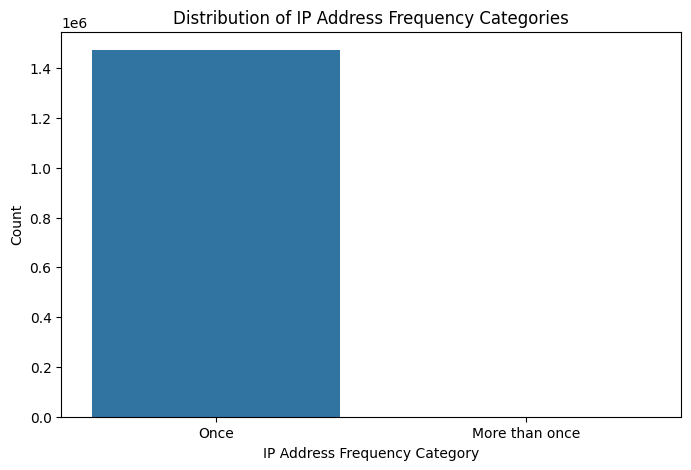

In [ ]:
analyze_ip_address_frequency_comparison(df, "shipping_address")

**Billing address**

What we see here is very close to the shiping_address analysis, except for one register, that very suspicious. Later we will deal with this.


IP Address Frequency Categories:
ip_addrss_frequency_category
Once              0.999996
More than once    0.000004
Name: proportion, dtype: float64

How many appear more than once:  6


/var/folders/lf/kdk85w7d6r1_7wly2dv5687m0000gn/T/ipykernel_41890/4291750186.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nHow many appear more than once: ",df_aux['ip_addrss_frequency_category'].value_counts()[1])


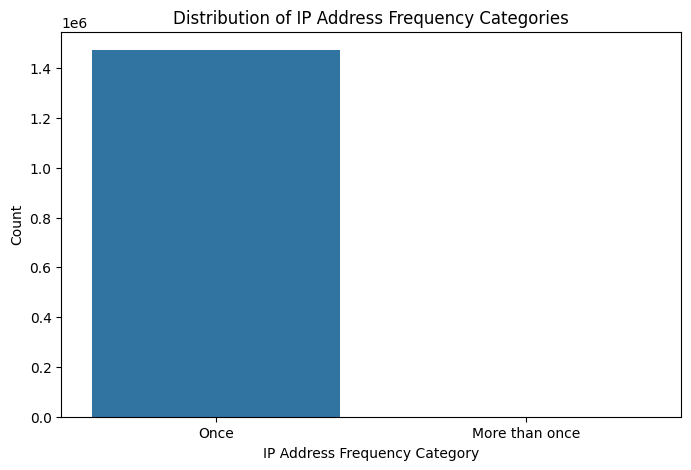

In [60]:
analyze_ip_address_frequency_comparison(df, "billing_address")

**Account age**

The account_age_days column show average age account (approximately 179 days), the variation (standard deviation of about 107 days), and the concentration of most frequent values are newly created accounts with less than 30 days old.


---------------------------------------------------------
--- Univariate Analysis of Column: account_age_days ---
---------------------------------------------------------

1) Descriptive Statistics:
count    1472952.000000
mean         179.646398
std          106.864223
min            1.000000
25%           86.000000
50%          179.000000
75%          272.000000
90%          328.000000
95%          347.000000
99%          362.000000
max          365.000000
Name: account_age_days, dtype: object

2) Top 10 Most Frequent Values:
account_age_days
11    5112
21    5065
18    5044
15    5033
17    5028
9     5021
27    5004
6     4990
5     4979
4     4972
Name: count, dtype: int64

3) Distribution Visualization


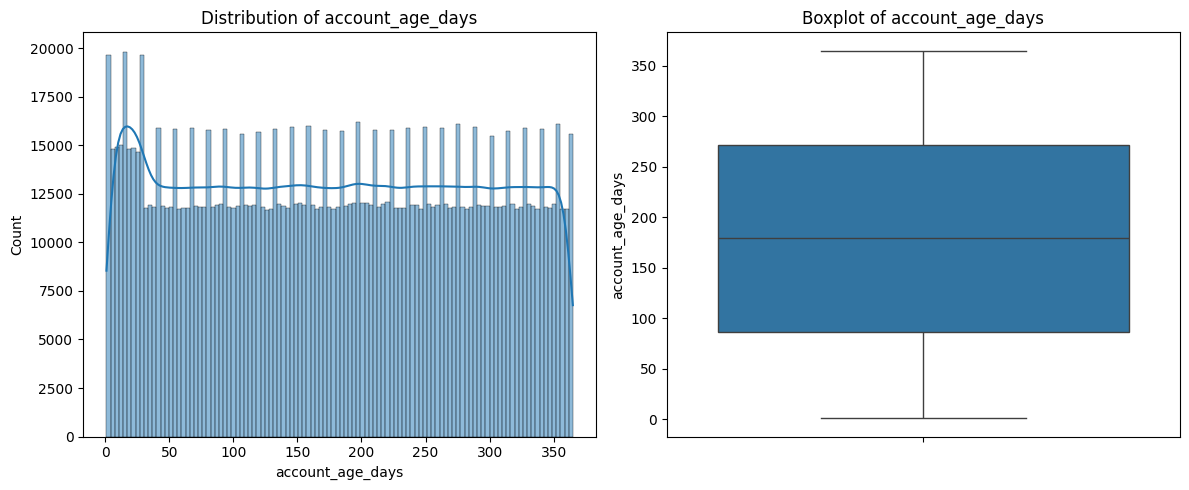

In [64]:
analyze_numeric(df, "account_age_days")

**Transaction hour**

---------------------------------------------------------
--- Univariate Analysis of Column: transaction_hour ---
---------------------------------------------------------

1) Frequency Count:
transaction_hour
3     4.483717
4     4.461856
2     4.459955
0     4.442643
1     4.434428
5     4.430015
6     4.112626
7     4.107466
12    4.095721
21    4.092258
13    4.081871
11    4.074471
20    4.073860
23    4.070941
18    4.069786
14    4.068972
8     4.066731
16    4.064491
10    4.059331
15    4.058177
17    4.055869
19    4.051863
9     4.048197
22    4.034755
Name: proportion, dtype: float64

2) Unique Categories: 24

3) Distribution Visualization


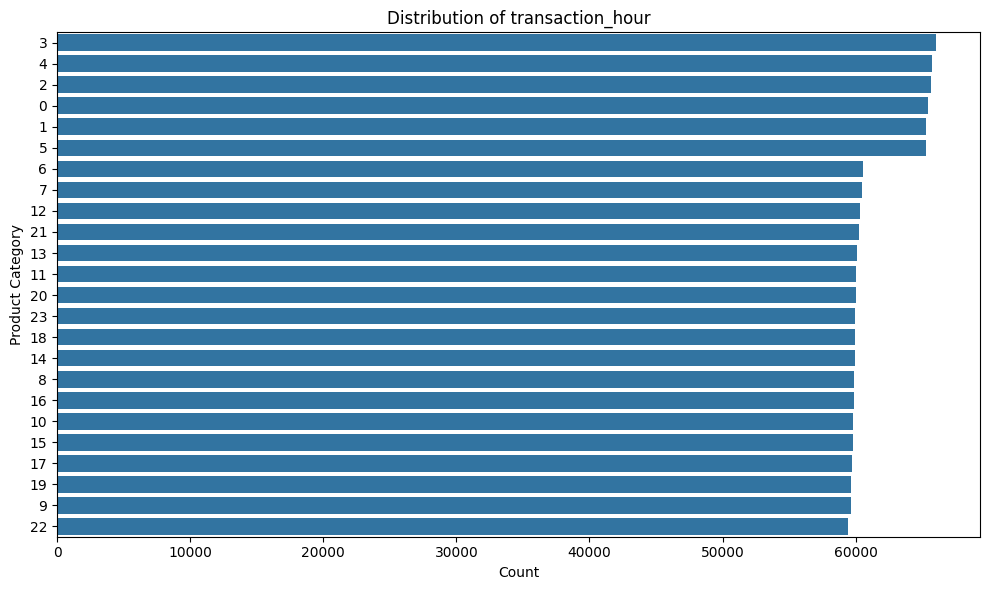

In [ ]:
analyze_categorical(df, "transaction_hour")

**Is fraudulent**

This dataset was created artificially and does not reflect the real world. To work with more realistic data, even though the distribution of most variables here also doesn't resemble what we see in the real world, we will perform undersampling only on the fraud events. The objective is to observe a fraud rate of approximately 1% to 2%. 

The results might not reflect reality, also, but the focus on this project is to explore weak supervision methodologies.

In [69]:
df.is_fraudulent.value_counts(normalize=True)*100

is_fraudulent
0    94.987074
1     5.012926
Name: proportion, dtype: float64